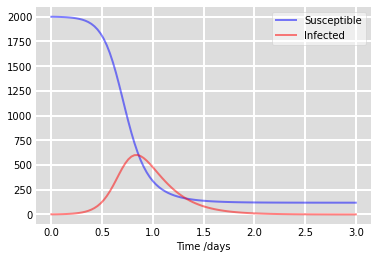

In [126]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
#N = 2000
# Initial number of infected individuals, I0
I0 = 1
# Everyone else, S0, is susceptible to infection initially.
S0 = 2000
# Contact rate, beta, and mean recovery rate, mu.
beta, mu = 0.0075, 5
# A grid of time points (in days)
t = np.linspace(0, 3, 100) 

# The SIR model differential equations.
def deriv(y, t, N, beta, mu):
    S, I = y
    dSdt = -beta * S * I 
    dIdt = beta * S * I - mu * I
    return dSdt, dIdt

# Initial conditions vector
y0 = S0, I0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, mu))
S, I = ret.T

# Plot the data on two separate curves for S(t), I(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
ax.set_xlabel('Time /days')
#ax.set_ylabel('Number (1000s)')
#ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [130]:
#save to csv file
a = np.asarray([t, S, I ]) 

#np.savetxt("tSI_data.csv", a, delimiter=",")

In [4]:
#load csv file
#from numpy import genfromtxt
#csv_file = genfromtxt('SIR_data.csv', delimiter=',')
#csv_file.shape

(3, 1000)

In [131]:
tao_star_list = []
T_star_list = []
T_list = []
tao_list = []

# Initial number of infected individuals, I0
I0 = 1
# Initial number of susceptible individuals, S0
S0 = 2000
# Contact rate, beta, and mean recovery rate, mu.
beta, mu = 0.0075, 5
# A grid of time points (in days)
t = np.linspace(0, 3, 100) 
taos = np.linspace(0,3, 100) #0.1 step size 
us = np.linspace(0,3, 100) #0.1 step size 

epsilon = 0.5

# The SIR model differential equations.
def deriv(y, t, N, beta, mu, u, tao):
    S, I = y
    dSdt = -beta * S * I - u *(t>=tao) * S 
    dIdt = beta * S * I - mu * I
    return dSdt, dIdt


for u in us:
    for tao in taos:
        # Initial conditions vector
        y0 = S0, I0
        # Integrate the SIR equations over the time grid, t.
        ret = odeint(deriv, y0, t, args=(N, beta, mu, u, tao))
        S, I = ret.T

        #Ti is 1st time when I<epsilon
        Ti_idx = np.where(I<epsilon)[0][0]
        T_list.append(t[Ti_idx])
        tao_list.append(tao)

    #T_min = minimum over all of the 1st times where I<epsilon 
    T_min = min(T_list)
    idx = T_list.index(T_min) #get the index in order to find the corresponding tao
    T_star_list.append(T_min)
    #tao_star is the corresponding tao for the T_min 
    tao_star = tao_list[idx]
    tao_star_list.append(round(tao_star,2))

In [134]:
#for i in range(len(us)):
#    print('u: ', us[i], 'tao star: ', tao_star_list[i], 'T_star: ', T_star_list[i])

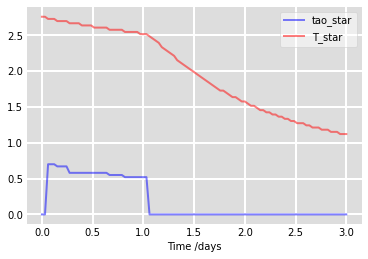

In [133]:
# Plot the data on two separate curves for S(t), I(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, tao_star_list, 'b', alpha=0.5, lw=2, label='tao_star')
ax.plot(t, T_star_list, 'r', alpha=0.5, lw=2, label='T_star')
ax.set_xlabel('Time /days')

ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [135]:
#save to csv file
b = np.asarray([t, tao_star_list, T_star_list]) 
#np.savetxt("tao_data.csv", b, delimiter=",")